## 2. Available Script:

In [3]:
# execute this for the 1st time\n",
# !pip install -r example-requirements.txt \n",

# download file \n",
!wget http://helon.usuarios.rdc.puc-rio.br/data/data3SS2009.mat # linux\n",

# and place in folder data/"

! pip install statsmodels --upgrade

--2023-10-26 06:44:27--  http://helon.usuarios.rdc.puc-rio.br/data/data3SS2009.mat
Resolving helon.usuarios.rdc.puc-rio.br (helon.usuarios.rdc.puc-rio.br)... 139.82.34.12
Connecting to helon.usuarios.rdc.puc-rio.br (helon.usuarios.rdc.puc-rio.br)|139.82.34.12|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 267634147 (255M)
Saving to: ‘data3SS2009.mat’

data3SS2009.mat     100%[===================>] 255.24M  16.5MB/s    in 14s     

2023-10-26 06:44:42 (17.7 MB/s) - ‘data3SS2009.mat’ saved [267634147/267634147]



In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import scipy.io as sio
import numpy as np
import os
from os import getcwd
from os.path import join
import matplotlib.pyplot as plt

import statsmodels.api as sm
from statsmodels.tsa.ar_model import AutoReg

In [6]:
fname = join(os.getcwd(),'data3SS2009.mat')

mat_contents = sio.loadmat(fname)

dataset = mat_contents['dataset']

N, Chno, Nc = dataset.shape
# N: number of samples
# Chno: number of channels
# Nc: number of cases

y = mat_contents['labels'].reshape(Nc)
y

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  5,  5,  5,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,
        5,  5,  5,  5,  5

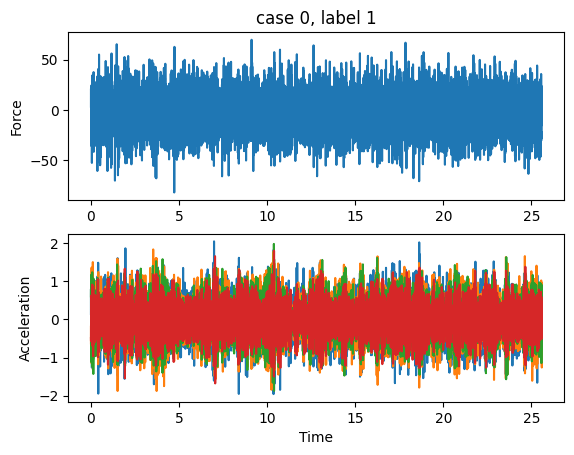

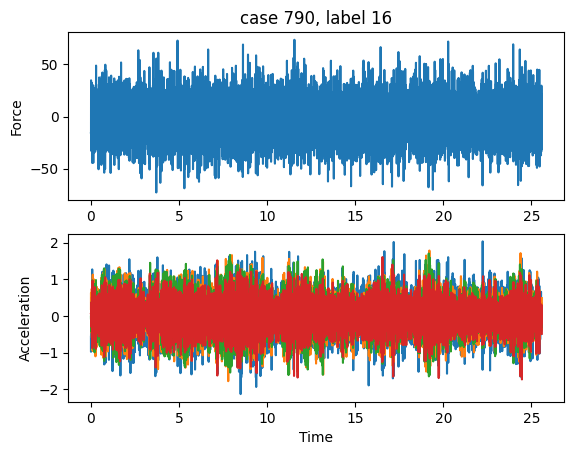

In [7]:
Ch1 = dataset[:,0,:] # célula de carga: força do shaker
Ch2 = dataset[:,1,:] # acelerômetro: base
Ch3 = dataset[:,2,:] # acelerômetro: 1o andar
Ch4 = dataset[:,3,:] # acelerômetro: 2o andar
Ch5 = dataset[:,4,:] # acelerômetro: 3o andar

Ts = 3.125 * 1e-3 # sampling time
time = (np.linspace(1,N,N) - 1) * Ts

for case in np.array([0,790]):
    plt.figure(case)
    plt.subplot(211)
    plt.title('case %d, label %d' % (case, y[case]))
    plt.plot(time,Ch1[:,case])
    plt.ylabel('Force')
    plt.subplot(212)
    plt.plot(time,Ch2[:,case],time,Ch3[:,case],time,Ch4[:,case],time,Ch5[:,case])
    plt.xlabel('Time')
    plt.ylabel('Acceleration')
    plt.show()


## 4. Obtain features

## AR Models

**a. Ch2-Ch5, concatenating each AR model coefficient of each channel (model order = 30)**

**a. X1 ---> 850lines; 30*4=120 columns**

In [8]:
X = np.concatenate((Ch2,Ch3,Ch4,Ch5))
X
print( 'matrix X: ', X, '\n matrix X.shape: ',X.shape)


matrix X:  [[ 0.14656393  0.12344872 -0.42452564 ...  0.62527312  0.18531354
  -0.08524884]
 [ 0.79236289  0.26123975 -0.52503197 ...  0.5761841   0.75775165
  -0.38039847]
 [ 0.17113439  0.98893784  0.60084113 ... -0.10711284  0.6940215
  -0.20874206]
 ...
 [ 0.21738063  0.40702133  0.44190305 ... -0.43805704  0.31272412
   0.07283314]
 [-0.03923676  0.18921679  0.05709407 ... -0.40076345  0.02953589
   0.34142521]
 [ 0.03684378 -0.30327268 -0.64940672 ... -0.17947949 -0.69738006
   0.42497897]] 
 matrix X.shape:  (32768, 850)


In [9]:
FeatAR = []  # Feature extraction AR
na = 29      # Model Order = 30 (0-29)
for i in range(0,850):
  ARmodel2 = AutoReg(Ch2[:,i],na).fit()
  ARmodel3 = AutoReg(Ch3[:,i],na).fit()
  ARmodel4 = AutoReg(Ch4[:,i],na).fit()
  ARmodel5 = AutoReg(Ch5[:,i],na).fit()
  ARparams = np.concatenate([ARmodel2.params,ARmodel3.params, ARmodel4.params,ARmodel5.params])
  FeatAR.append(ARparams)
FeatAR = np.array(FeatAR)

X1 = FeatAR
print('matrix X1: ',X1.shape)


matrix X1:  (850, 120)


## PCA

**b. PCA of the matrix built in 4.a.a.**

   **a. X2 ---> 850 lines; << 120 columns after dimensionality reduction**

matrix X2:  (850, 6)
Percentage of Explained Variance: [64.7  12.65  9.02  5.11  2.62  1.95]
Cumulative Variance Explained: [64.7  77.35 86.37 91.48 94.1  96.05]


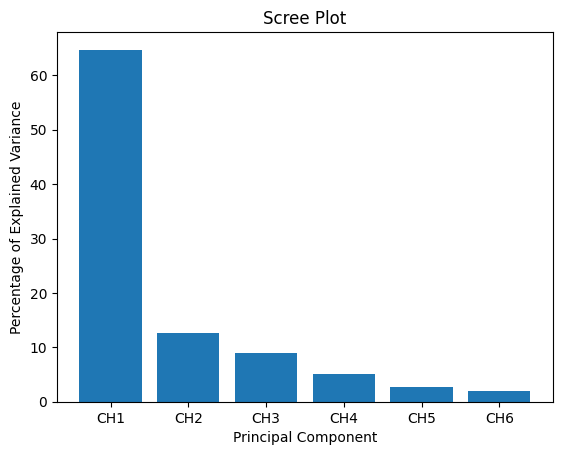

In [10]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)  # 95% Intervalo de confiança
X2 = pca.fit_transform(FeatAR)
per_var = np.round(pca.explained_variance_ratio_*100,decimals=2)
labels = ['CH'+str(X) for X in range(1,len(per_var)+1)]

# Quantos componentes explicam ao menos 95% da variabilidade dos dados?
print('matrix X2: ',X2.shape)
print('Percentage of Explained Variance:', per_var)
print('Cumulative Variance Explained:',np.cumsum(per_var))

# Plot
plt.bar(x=range(1,len(per_var)+1), height = per_var, tick_label = labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
#plt.plot(per_var,'ro-')
plt.show()

## Scaling features to a range

**b.Scale all features individually in e.g. [-1,1]**


In [11]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(-1, 1))

# AR Model
X1_data = scaler.fit_transform(X1)
X1_data.max()
X1_data.min()

# PCA
X2_data = scaler.fit_transform(X2)
X2_data.max()
X2_data.min()

# Print the data with the scaled features
print('Matrix X1_Train:',X1_data.shape)
print('Matrix X2_Train:',X2_data.shape)
print('Normalização:','\n X1 máximo normalizado: ', X1_data.max(), '\n X1 mínimo normalizado: ',X1_data.min(),'\n X2 máximo normalizado: ', X2_data.max(), '\n X2 minimo normalizado: ',X2_data.min())


Matrix X1_Train: (850, 120)
Matrix X2_Train: (850, 6)
Normalização: 
 X1 máximo normalizado:  1.0000000000000004 
 X1 mínimo normalizado:  -1.0 
 X2 máximo normalizado:  1.0000000000000004 
 X2 minimo normalizado:  -1.0


## Plots

**c. Visualize and compare X1, X2 (see code in Plotting multidimensional spaces)**

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates


## SOFTMAX

**Use a softmax linear model and test each of the feature matrices you built X1, X2**

In [54]:
#import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Create and train the softmax linear model on X1 and X2
softmax1 = LogisticRegression(random_state=None,solver="lbfgs",max_iter=1000).fit(X1_data, y)
softmax2 = LogisticRegression(random_state=None,solver="lbfgs",max_iter=1000).fit(X2_data, y)

# Predict on the testing data for X1 and X2
y_pred_x1 = softmax1.predict(X1_data)
score_1 = softmax1.score(X1_data,y)

y_pred_x2 = softmax2.predict(X2_data)
score_2 = softmax2.score(X2_data,y)

print('score_X1', score_1,'\nscore_X2', score_2)

score_X1 0.9988235294117647 
score_X2 0.908235294117647


## SVM

**1. Test SVM and kNN models for the problem discussed in the previous takehome
exercise (use the same pre-processing methods)**

**2. Try different combinations for the hyperparameters
(non-exhaustively for now, as we will learn afterwards how to create a set
of models using cross-validation)**

**3. Discuss how do they compare to the linear model**

In [71]:
# SVR - Support Vector Regression

from sklearn import svm
from sklearn.svm import SVR

#---AR Models

# Create and train the kNN model
    svr_lin_X1 = svm.SVR(C=1.0, epsilon=0.2,kernel='linear').fit(X1_data,y)  #kernel:{‘linear’}
    svr_poly_X1 = svm.SVR(C=1.0, epsilon=0.2,kernel='poly').fit(X1_data,y)
    svr_rbf_X1= svm.SVR(C=1.0, epsilon=0.2,kernel='rbf').fit(X1_data,y)

# Make predictions on the test data
   lin_pred_Y1 = svr_lin_X1.predict(X1_data)
   poly_pred_Y1 = svr_poly_X1.predict(X1_data)
   rbf_pred_X1 = svr_rbf_X1.predict(X1_data)


# Calculate accuracy and store it
    accuracy_svr_lin_X1 = accuracy_score(y, y_pred_X1)
    accuracies_lin_X1.append(accuracy_svr_lin_X1)
    score_svr_lin_X1 = svr_poly_X1.score(X1_data,y)

    accuracy_svr_poly_X1 = accuracy_score(y, y_pred_X1)
    accuracies_poly_X1.append(accuracy_svr_poly_X1)
    score_svr_poly_X1 = svr_poly_X1.score(X1_data,y)

    accuracy_svr_rbf_X1 = accuracy_score(y, y_pred_X1)
    accuracies_rbf_X1.append(accuracy_svr_rbf_X1)


#---AR Models

svr_lin_X2 = svm.SVR(C=1.0, epsilon=0.2,kernel='linear').fit(X2_data,y)
lin_pred_X2 = svr_lin_X2.predict(X2_data)
score_svr_lin_X2 = svr_lin_X2.score(X2_data,y)

#---kernel:{‘poly’}

#AR




#PCA
svr_poly_X2 = svm.SVR(C=1.0, epsilon=0.2,kernel='poly').fit(X2_data,y)
poly_pred_X2 = svr_poly_X2.predict(X2_data)
score_svr_poly_X2 = svr_poly_X2.score(X2_data,y)

#---kernel:{‘rbf’}

#AR



#PCA
svr_rbf_X2 = svm.SVR(C=1.0, epsilon=0.2,kernel='rbf').fit(X2_data,y)
rbf_pred_Y2 = svr_rbf_X2.predict(X2_data)
score_svr_rbf_X2 = svr_poly_X2.score(X2_data,y)

# Comparison
metrics_table = pd.DataFrame({'Kernel': ['Linear', 'Poly', 'RBF'],
                              'AR_Score': [score_svr_lin_X1, score_svr_poly_X1, score_svr_rbf_X1],
                              'PCA_Score': [score_svr_lin_X2, score_svr_poly_X2, score_svr_rbf_X2]})
print(metrics_table)

   Kernel  AR_Score  PCA_Score
0  Linear  0.983018   0.820635
1    Poly  0.966354   0.921306
2     RBF  0.985104   0.921306


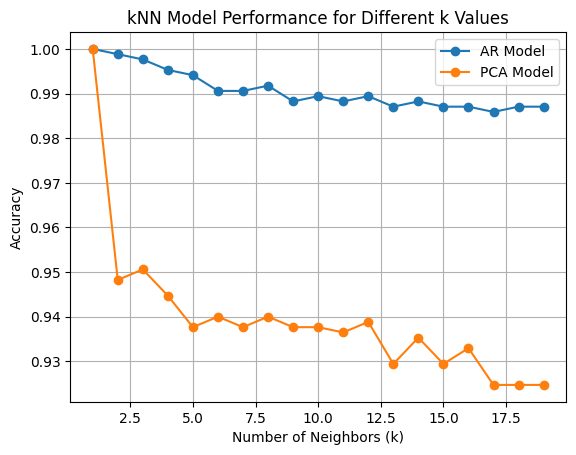

In [75]:
#k-Nearest Neighbors (kNN)

from sklearn.neighbors import KNeighborsClassifier

k_values = range(1, 20)  # A range of k values to test

accuracies_X1 = []  # To store accuracy values for each k
accuracies_X2 = []  # To store accuracy values for each k

for k in k_values:
    # Create and train the kNN model
    knn_X1 = KNeighborsClassifier(n_neighbors=k).fit(X1_data, y)
    knn_X2 = KNeighborsClassifier(n_neighbors=k).fit(X2_data, y)

    # Make predictions on the test data
    y_pred_X1 = knn_X1.predict(X1_data)
    y_pred_X2 = knn_X2.predict(X2_data)

    # Calculate accuracy and store it
    accuracy_X1 = accuracy_score(y, y_pred_X1)
    accuracies_X1.append(accuracy_X1)

    accuracy_X2 = accuracy_score(y, y_pred_X2)
    accuracies_X2.append(accuracy_X2)

# Plot the results
plt.plot(k_values, accuracies_X1, marker='o',label='AR Model')
plt.plot(k_values, accuracies_X2, marker='o',label='PCA Model')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('kNN Model Performance for Different k Values')
plt.grid(True)
plt.legend()
plt.show()

Analisando os resultados apresentados por ambos os métodos, o desempenho dos modelos para os dados AR foi sempre superior. Para os modelos SVM testados o que apresentou melhor desempenho quando comparado ao modelo linear, foi o modelo kernel RBF. Quanto ao modelo KNN é possível observar que quanto maior o valor de k menor a precisão do modelo.

